<a href="https://colab.research.google.com/github/Sbolivar16/Gromacs-Tools/blob/main/GMX_MMPBSA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📊 **Binding Energy Analysis via MMPBSA Calculations**

<div align="center">

🧪 **Santiago Bolívar A.**  
**Chemist, M.Sc., Ph.D.**  
📍 *National University of Rosario, Argentina*  
🔗 [GitHub Profile](https://github.com/Sbolivar16)

</div>

---

MMPBSA (**Molecular Mechanics Poisson–Boltzmann Surface Area**) is a widely adopted technique in computational chemistry for estimating the **free binding energy** between a ligand and its receptor (usually a protein). This method combines molecular mechanics energies with implicit solvation models to evaluate the stability and affinity of a molecular complex without explicitly simulating binding or unbinding events.

The MMPBSA approach decomposes the total binding free energy into the following components:

- Van der Waals energy (ΔE<sub>vdW</sub>)
- Electrostatic energy (ΔE<sub>ele</sub>)
- Polar solvation energy (ΔG<sub>polar</sub>)
- Nonpolar solvation energy (ΔG<sub>nonpolar</sub>)
- Total binding free energy (ΔG<sub>total</sub>)

---

### 🗂️ Input Files

This notebook requires two key files generated by `gmx_MMPBSA`:

- `FINAL_RESULTS_MMPBSA.dat`: contains the **average energy values** for the full system (ligand + receptor).
- `FINAL_DECOMP_MMPBSA.dat`: provides the **per-residue decomposition** of the binding energy, enabling identification of key stabilizing or destabilizing residues.

---

### 📈 Graphs and Visualizations

This notebook generates several insightful visualizations:

1. **Global Energy Components**  
   A bar chart displaying the contribution of each energy term to the total binding.

2. **Per-Residue Energy Contribution**  
   - Lists and visualizations of the residues with the highest stabilizing (most negative) and destabilizing (most positive) contributions.

3. **Interaction Type Decomposition**  
   - Separate analysis of van der Waals, electrostatics, polar and nonpolar solvation contributions per residue.

4. **Stacked Bar Chart with Data Table**  
   - A combined bar graph and embedded table for the top contributing residues and their interaction energies.

---

### 🧠 Tips for Interpreting the Results

- **Residues with negative ΔG values** contribute to **stabilizing** the ligand-receptor complex.
- **Positive ΔG values** indicate **destabilizing** interactions.
- Comparing **electrostatic vs. hydrophobic contributions** helps to understand the nature of the binding.
- A significantly negative global ΔG<sub>total</sub> suggests strong ligand affinity toward the protein.

---


In [1]:
# ✅ Install required libraries (if not already installed)
!pip install pandas matplotlib seaborn --quiet


In [31]:
from google.colab import files
import os

# Step 1: Upload files
print("🔼 Please select the necessary files for analysis (e.g., FINAL_RESULTS_MMPBSA.dat and FINAL_DECOMP_MMPBSA.dat):")
uploaded = files.upload()

# Step 2: Required files
required_files = [
    "FINAL_RESULTS_MMPBSA.dat",
    "FINAL_DECOMP_MMPBSA.dat"
]

# Step 3: Verification checklist
print("\n📋 Verifying required files:\n")

for fname in required_files:
    if fname in uploaded:
        print(f"✅ {fname} was successfully uploaded.")
    else:
        print(f"❌ {fname} not found. Please upload it.")



🔼 Please select the necessary files for analysis (e.g., FINAL_RESULTS_MMPBSA.dat and FINAL_DECOMP_MMPBSA.dat):


Saving FINAL_DECOMP_MMPBSA.dat to FINAL_DECOMP_MMPBSA (1).dat
Saving FINAL_RESULTS_MMPBSA.dat to FINAL_RESULTS_MMPBSA (1).dat

📋 Verifying required files:

❌ FINAL_RESULTS_MMPBSA.dat not found. Please upload it.
❌ FINAL_DECOMP_MMPBSA.dat not found. Please upload it.


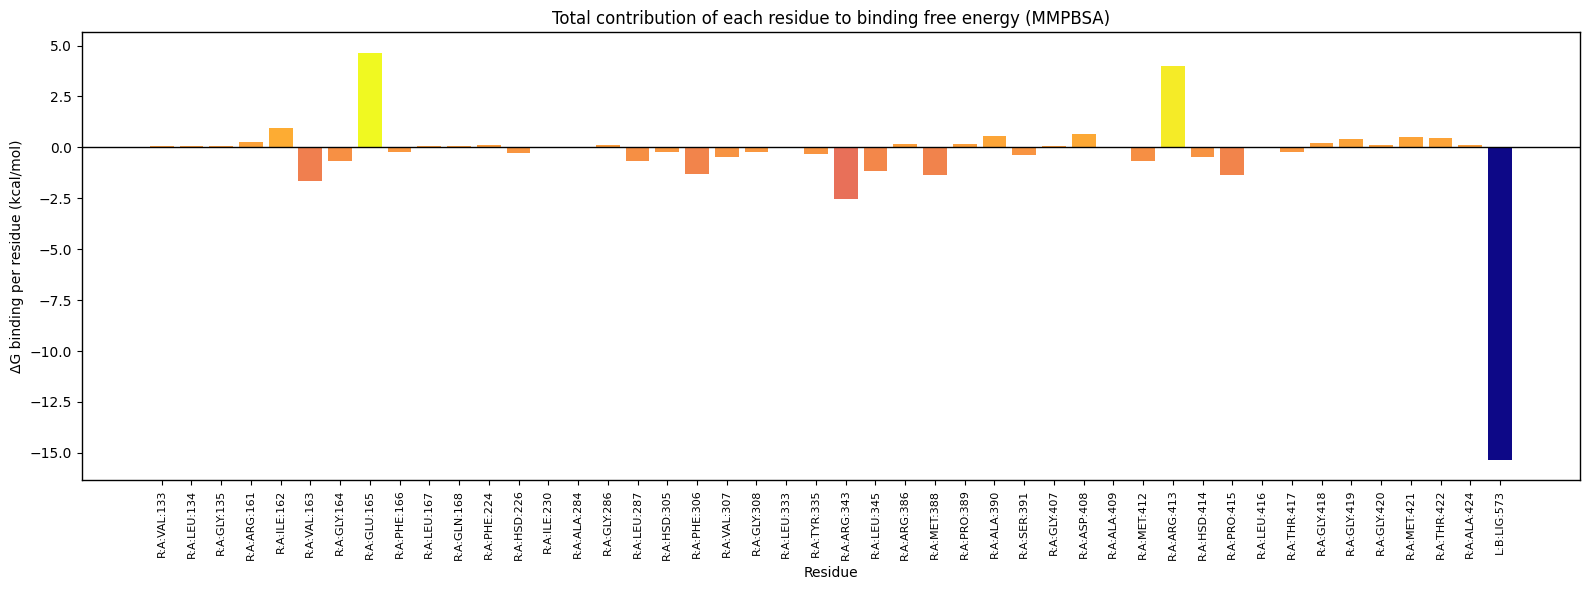

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read and clean the file
df = pd.read_csv("FINAL_DECOMP_MMPBSA.dat", skiprows=8)
df.dropna(axis=1, how='all', inplace=True)

# Rename columns
df.columns = [
    "Residue",
    "Internal Avg", "Internal SD", "Internal SEM",
    "vdW Avg", "vdW SD", "vdW SEM",
    "Elec Avg", "Elec SD", "Elec SEM",
    "PolSolv Avg", "PolSolv SD", "PolSolv SEM",
    "NonPolSolv Avg", "NonPolSolv SD", "NonPolSolv SEM",
    "TOTAL Avg", "TOTAL SD", "TOTAL SEM"
]

# Color map based on total energy contribution
norm = plt.Normalize(df["TOTAL Avg"].min(), df["TOTAL Avg"].max())
colors = plt.cm.plasma(norm(df["TOTAL Avg"]))

# Create figure
plt.figure(figsize=(16, 6))
bars = plt.bar(df["Residue"], df["TOTAL Avg"], color=colors)

# Axes and titles
plt.xticks(rotation=90, fontsize=8)
plt.ylabel("ΔG binding per residue (kcal/mol)")
plt.xlabel("Residue")
plt.title("Total contribution of each residue to binding free energy (MMPBSA)")

# Horizontal reference line
plt.axhline(0, color='black', linestyle='-', linewidth=1)

# Aesthetics: white background and all borders visible
plt.gca().set_facecolor('white')  # white background
plt.grid(False)                   # no gridlines

# Show all plot borders
for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()


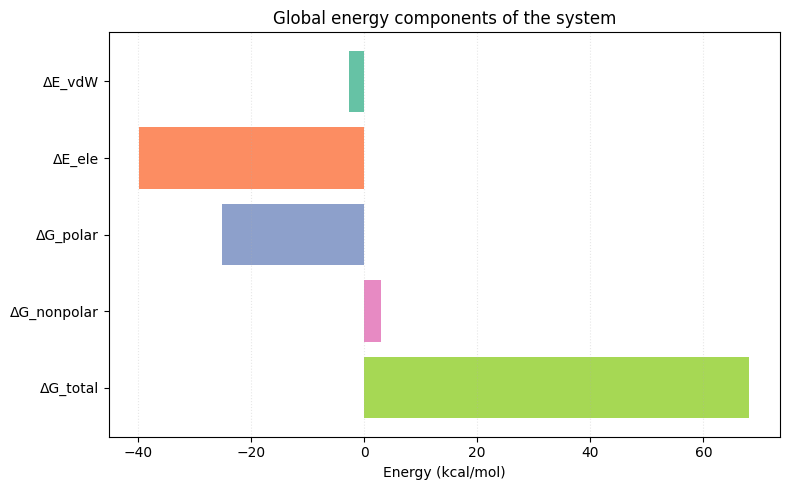

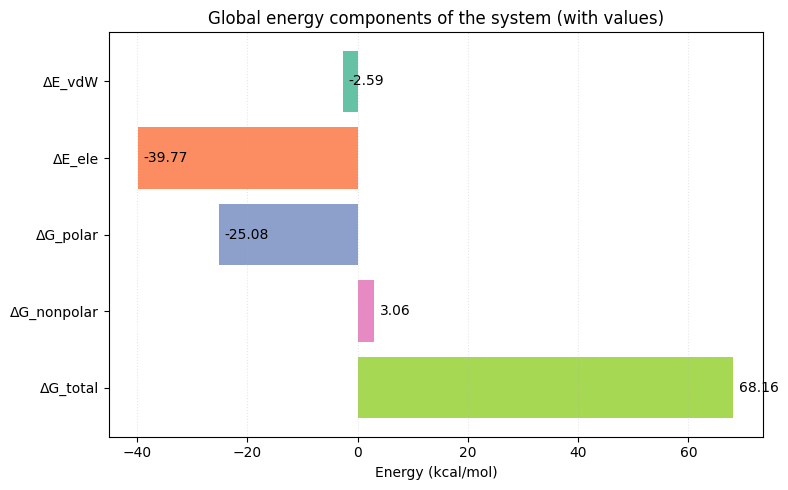

In [33]:
# Extract key energy terms from FINAL_RESULTS_MMPBSA.dat
terms_to_extract = {
    "VDWAALS": "ΔE_vdW",
    "EEL": "ΔE_ele",
    "EPB": "ΔG_polar",
    "ENPOLAR": "ΔG_nonpolar",
    "TOTAL": "ΔG_total"
}

energy_terms = {}

with open("FINAL_RESULTS_MMPBSA.dat", "r") as f:
    for line in f:
        for key, label in terms_to_extract.items():
            if line.strip().startswith(key):
                value = float(line.split()[1])
                energy_terms[label] = value

import matplotlib.pyplot as plt

labels = list(energy_terms.keys())
values = [energy_terms[k] for k in labels]

# 🎨 Attractive color palette
colors = plt.cm.Set2.colors

# 🔹 Plot 1: Without numerical labels
plt.figure(figsize=(8,5))
plt.barh(labels, values, color=colors)
plt.xlabel("Energy (kcal/mol)")
plt.title("Global energy components of the system")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle=':', alpha=0.3)
plt.tight_layout()
plt.show()

# 🔹 Plot 2: With numerical labels
plt.figure(figsize=(8,5))
bars = plt.barh(labels, values, color=colors)
plt.xlabel("Energy (kcal/mol)")
plt.title("Global energy components of the system (with values)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle=':', alpha=0.3)

# Add values next to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()


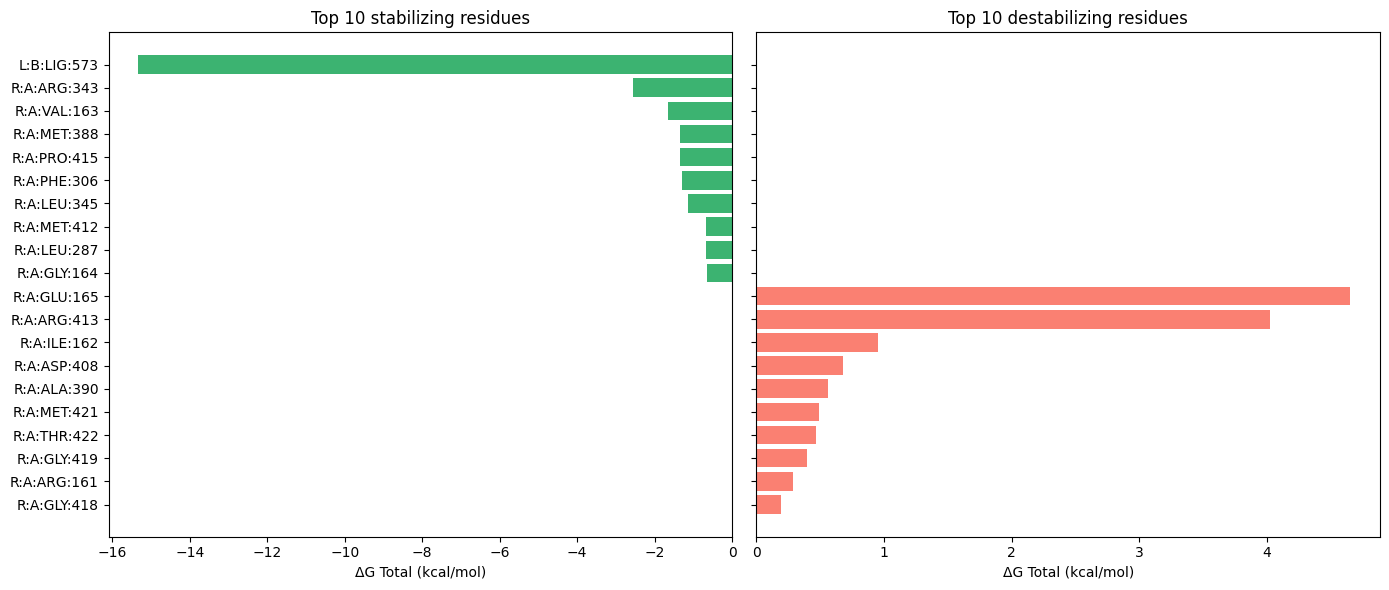

In [34]:
import pandas as pd

# Load and clean FINAL_DECOMP_MMPBSA.dat
df_decomp = pd.read_csv("FINAL_DECOMP_MMPBSA.dat", skiprows=8, header=None)
df_decomp = df_decomp.iloc[:, [0, 16]]  # Residue and TOTAL Avg.
df_decomp.columns = ["Residue", "TOTAL_Avg"]
df_decomp["TOTAL_Avg"] = pd.to_numeric(df_decomp["TOTAL_Avg"], errors="coerce")
df_decomp = df_decomp.dropna()

# Top 10 stabilizing residues
top_stabilizing = df_decomp.sort_values("TOTAL_Avg").head(10)

# Top 10 destabilizing residues
top_destabilizing = df_decomp.sort_values("TOTAL_Avg", ascending=False).head(10)

# Plot both
fig, axs = plt.subplots(1, 2, figsize=(14,6), sharey=True)

axs[0].barh(top_stabilizing["Residue"], top_stabilizing["TOTAL_Avg"], color="mediumseagreen")
axs[0].set_title("Top 10 stabilizing residues")
axs[0].invert_yaxis()
axs[0].set_xlabel("ΔG Total (kcal/mol)")

axs[1].barh(top_destabilizing["Residue"], top_destabilizing["TOTAL_Avg"], color="salmon")
axs[1].set_title("Top 10 destabilizing residues")
axs[1].set_xlabel("ΔG Total (kcal/mol)")

plt.tight_layout()
plt.show()


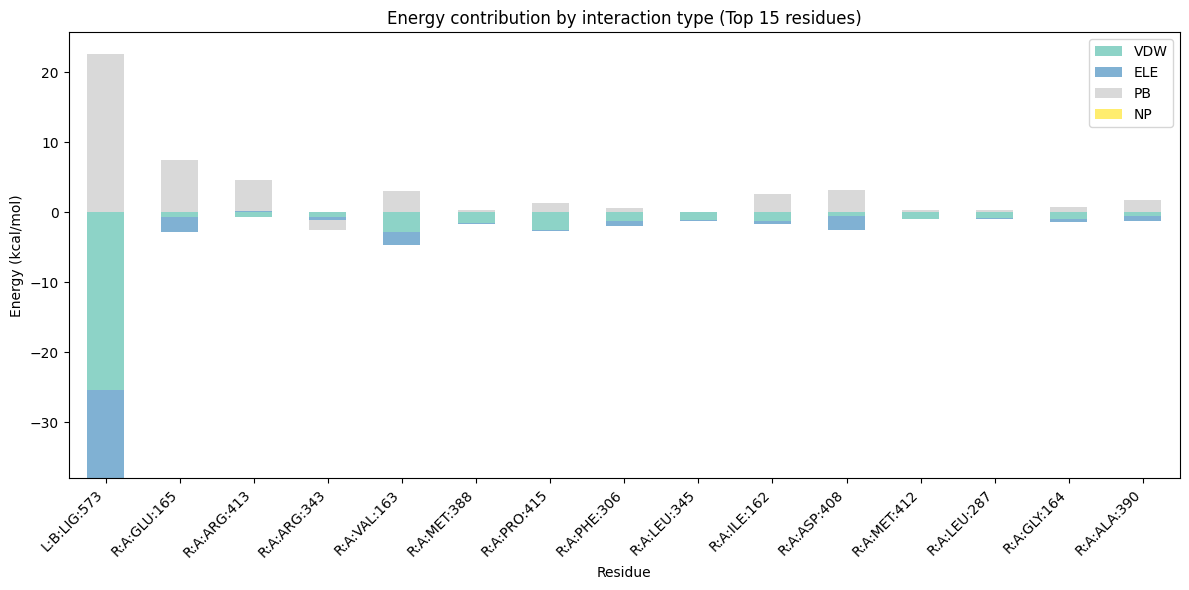

In [35]:
# Load relevant energy columns by type
cols = ["Residue", "VDW", "ELE", "PB", "NP"]
df_stack = pd.read_csv("FINAL_DECOMP_MMPBSA.dat", skiprows=8, header=None)
df_stack = df_stack.iloc[:, [0, 4, 7, 10, 13]]  # vdW, electrostatic, polar solvation, non-polar solvation
df_stack.columns = cols
df_stack[cols[1:]] = df_stack[cols[1:]].apply(pd.to_numeric, errors='coerce')
df_stack = df_stack.dropna()

# Select top 15 residues by magnitude of TOTAL contribution
df_stack["TOTAL"] = df_stack[cols[1:]].sum(axis=1)
df_stack_top = df_stack.sort_values("TOTAL", key=abs, ascending=False).head(15)

# Plot
df_stack_top.set_index("Residue")[["VDW", "ELE", "PB", "NP"]].plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap="Set3"
)
plt.title("Energy contribution by interaction type (Top 15 residues)")
plt.ylabel("Energy (kcal/mol)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



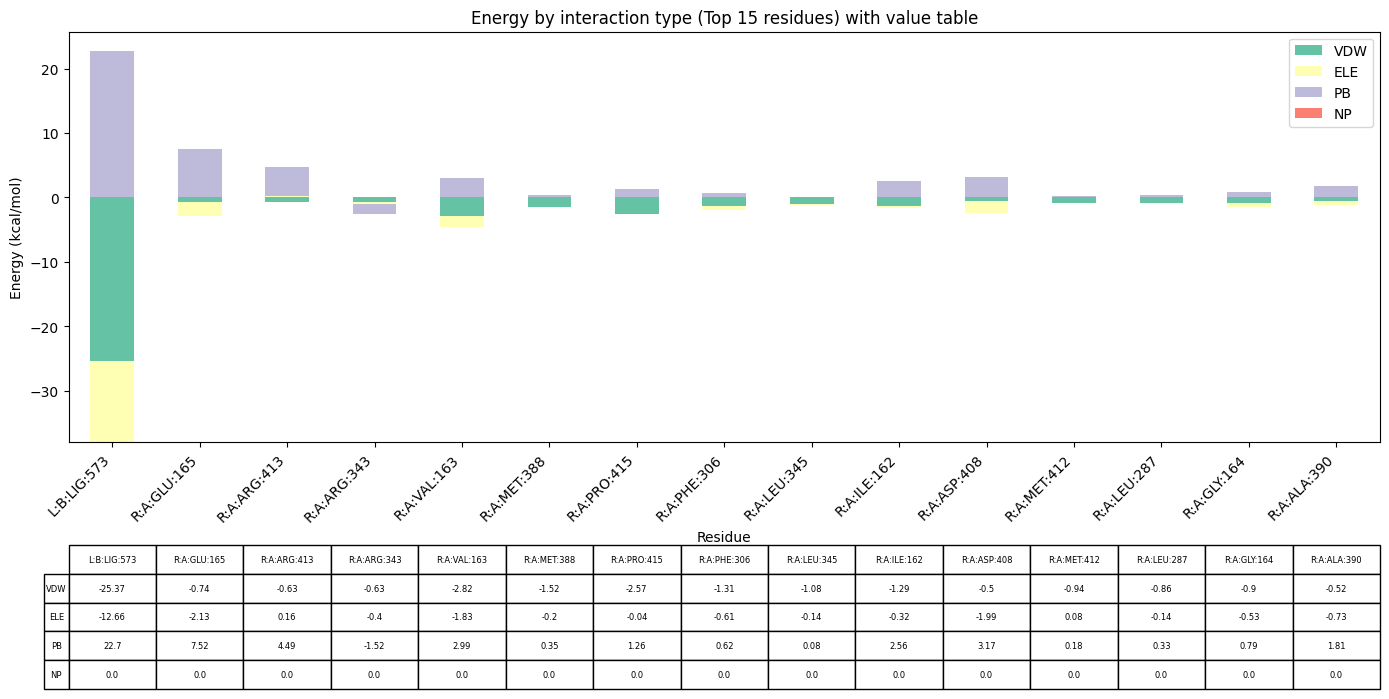

In [36]:
import matplotlib.pyplot as plt

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(14, 6))
colors = ['#66c2a5', '#ffffb3', '#bebada', '#fb8072']
df_plot.plot(kind='bar', stacked=True, color=colors, ax=ax)

# Add table below the plot
table = plt.table(
    cellText=df_plot.round(2).T.values,
    rowLabels=df_plot.columns,
    colLabels=df_plot.index,
    cellLoc='center',
    rowLoc='center',
    loc='bottom',
    bbox=[0.0, -0.6, 1, 0.35]  # ↓ Moved lower (was previously -0.45)
)

plt.subplots_adjust(bottom=0.5)  # ↓ Adjust bottom spacing
plt.title("Energy by interaction type (Top 15 residues) with value table")
plt.ylabel("Energy (kcal/mol)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

